In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_wpm = pd.read_csv('~/wpm/wpmdaily1000.csv')

In [11]:
def binnify(df,bincol,statcol,bin_size):
    
    df['bin'] = pd.cut(df[bincol], bins=range(int(df[bincol].min()), int(df[bincol].max()) + bin_size, bin_size))

    # Define the statistics you want to calculate
    stats = {
        'mean': 'mean',
        'min': 'min',
        'max': 'max',
        'med': 'median',
        'cnt': 'count',
        'std': 'std'
    }
    
    # Initialize the merged DataFrame with the 'bin' column
    merged_df = df.groupby('bin', observed=False).size().reset_index().rename(columns={0: 'size'}).drop(columns=['size'])

    for stat_name, func in stats.items():
            stat_df = df.groupby('bin', observed=False)[statcol].agg(func).round(1).reset_index().rename(columns={statcol: stat_name})
            #print(f"Shape of {stat_name} DataFrame: {stat_df.shape}")  # Debugging line
            merged_df = merged_df.merge(stat_df, on='bin', how='left')
    
    merged_df = merged_df[merged_df['cnt'] > 0]
    
    return merged_df.reset_index(drop=True)

In [12]:
def statbox(df,bincol,statcol,bin_size):
    
    df['bin'] = pd.cut(df[bincol], bins=range(int(df[bincol].min()), int(df[bincol].max()) + bin_size, bin_size))

    merged_df = binnify(df,bincol,statcol,bin_size)

    xwidths = [(w / max(list(merged_df.cnt)))**.8 for w in list(merged_df.cnt)]

    plt.figure(figsize=(10, 6))
    box_plot = sns.boxplot(x='bin', y=statcol, data=df, width=xwidths)
    plt.title(f'Box plot of {statcol} by {bincol} bins')
    plt.xlabel(bincol)
    plt.ylabel(statcol)
    bin_labels = [f'{int(interval.left)}' for interval in df['bin'].cat.categories]
    less_labels = bin_labels[0:len(bin_labels):int(7/bin_size)]
    plt.xticks(ticks=range(0,len(bin_labels),int(7/bin_size)), labels=less_labels, rotation=90)

    plt.show()


In [13]:
def plothisto(df,statcol):
    # Plot histogram
    print(f"int(df[statcol].max()-df[statcol].min()) = {(int(df[statcol].max()-df[statcol].min()))}")
    plt.figure(figsize=(10, 6))
    sns.histplot(df[statcol], bins=int(df[statcol].max()-df[statcol].min()), kde=True)
    plt.title(f'Histogram of {statcol}')
    plt.xlabel(statcol)
    plt.ylabel('Frequency')
    plt.show()


In [14]:
binnify(df_wpm,'wpm','accuracy',7).iloc[::5]

,bin,mean,min,max,med,cnt,std
0,"(57, 64]",94.3,85.4,100.0,94.9,137,3.3
5,"(92, 99]",95.4,87.6,99.6,96.0,73,2.7
10,"(127, 134]",97.3,90.8,100.0,97.5,30,1.9
15,"(162, 169]",93.9,86.5,100.0,92.5,7,4.9
20,"(197, 204]",94.2,94.2,94.2,94.2,1,NaN


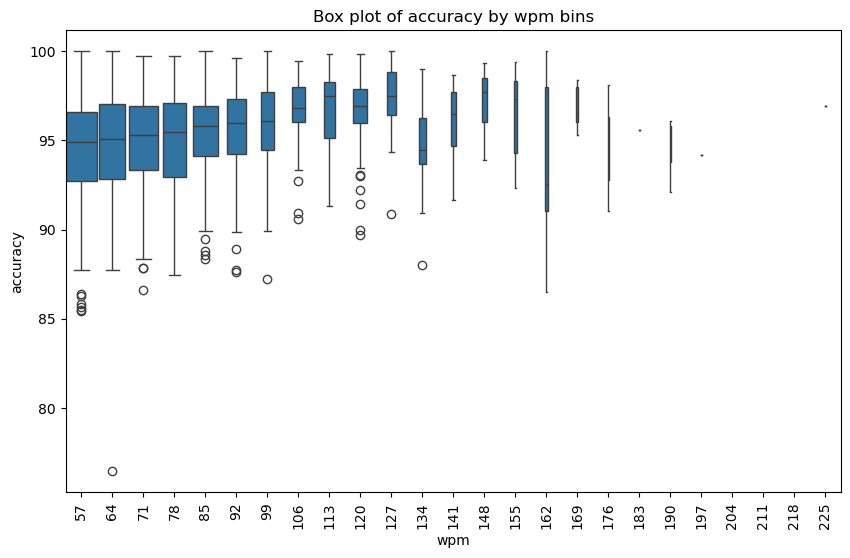

In [15]:
statbox(df_wpm,'wpm','accuracy',7)

int(df[statcol].max()-df[statcol].min()) = 23


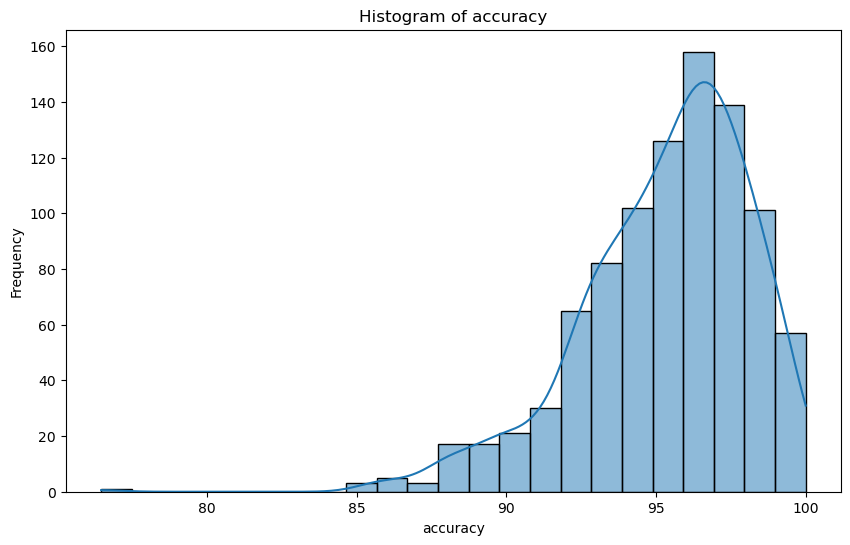

In [16]:
plothisto(df_wpm,'accuracy')

int(df[statcol].max()-df[statcol].min()) = 40


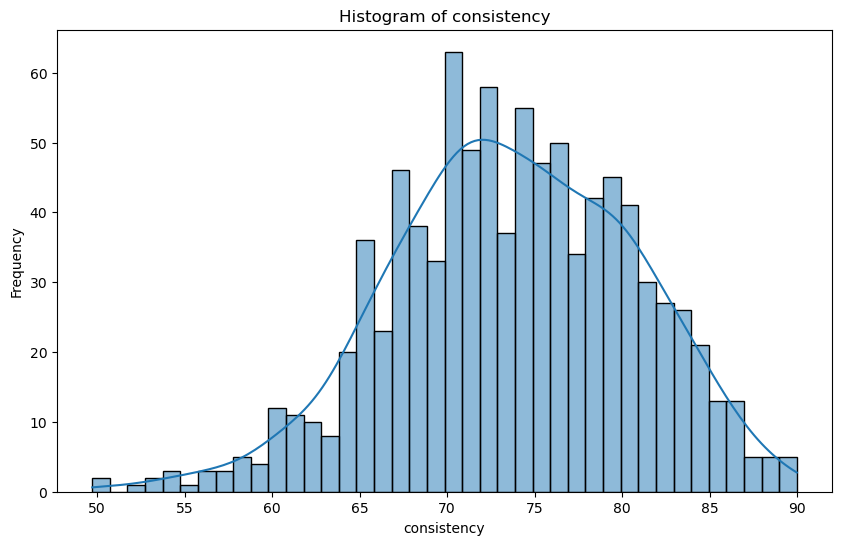

In [17]:
plothisto(df_wpm,'consistency')

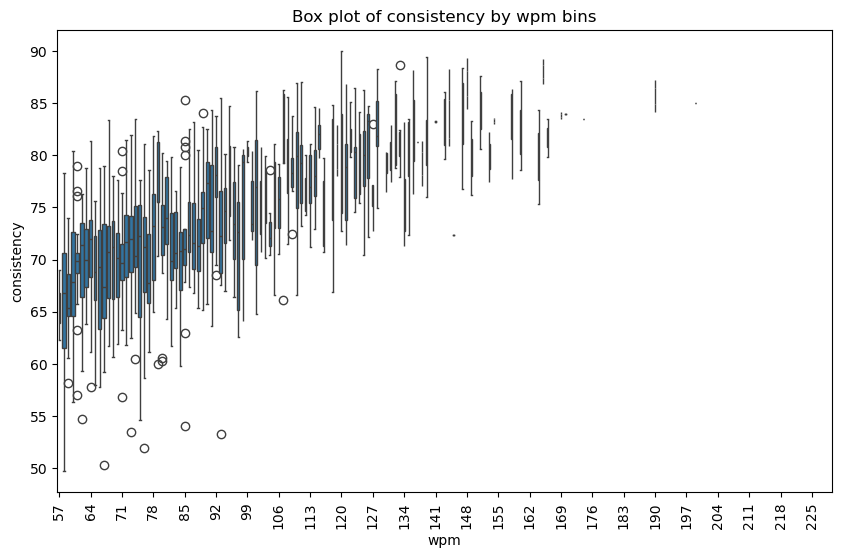

In [18]:
statbox(df_wpm,'wpm','consistency',1)

In [20]:
df_wpm[['wpm','raw','accuracy','consistency','diff']].corr()

,wpm,raw,accuracy,consistency,diff
wpm,1.000000,0.983912,0.203331,0.634493,0.391944
raw,0.983912,1.000000,0.076121,0.636665,0.549996
accuracy,0.203331,0.076121,1.000000,0.366823,-0.558545
consistency,0.634493,0.636665,0.366823,1.000000,0.312431
diff,0.391944,0.549996,-0.558545,0.312431,1.000000
